In [68]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import lib_data_load as ld
import lib_data_ref as dr
from datetime import date
import seaborn as sns

start_year = 2005
end_year = 2021

# load data into dictionnaries
dic_usagers = ld.load_usagers(start_year, end_year)
dic_caract = ld.load_caract(start_year, end_year)
dic_vehic = ld.load_vehicules(start_year=start_year, end_year=end_year)
dic_lieux = ld.load_lieux(start_year=start_year, end_year=end_year)

### Prepare df_usagers

In [69]:
# Concat all df usagers
# from 2005 to 2018 -> ['secu'] is splitted into ['secu1', 'secu2', 'secu3']
for year in range(start_year, end_year+1):
    df = dic_usagers[year]    
    if 2005 <= year <= 2018:
        # create columns ['secu1', 'secu2', 'secu3'] and drop old 'secu'
        df['secu'] = df['secu'].replace(to_replace=np.nan, value=-1)
        df['secu1'] = df['secu'] // 10
        df['secu2'] = df['secu'] % 10
        df['secu3'] = np.ones(len(df['secu']))*(-1)

        df = df.drop(columns=['secu'])
        df['secu1'] = df['secu1'].astype('int')
        df['secu2'] = df['secu2'].astype('int')
        df['secu3'] = df['secu3'].astype('int')
    
    if year == start_year:
        df_usagers = df
    else:
        df_usagers = pd.concat([df_usagers, df], axis=0)

# check number of lines
nb_lines = 0
for year in range(start_year, end_year+1):
    nb_lines += dic_usagers[year].shape[0]
    
print('somme des lignes :', nb_lines)
print('nb de lignes de df_usagers', df_usagers.shape[0])

somme des lignes : 2509620
nb de lignes de df_usagers 2509620


<AxesSubplot:>

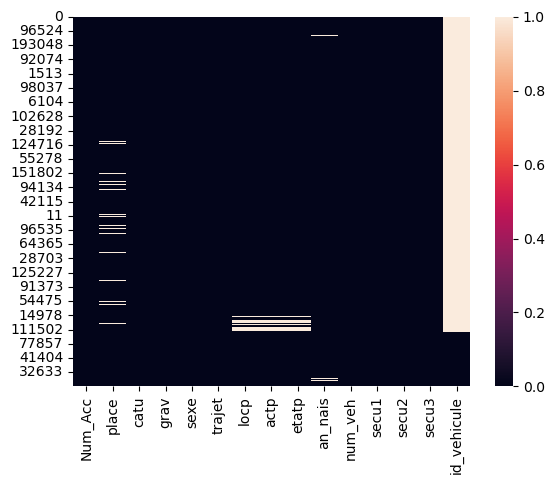

In [45]:
sns.heatmap(df_usagers.isna())

### Prepare df_caract

In [70]:
for year in range(start_year, end_year+1):
    df = dic_caract[year]
    if 'gps' in df.columns:
        df = df.drop(columns=['gps'], axis=1)
    
    if year == start_year:
        df_caract = df
    else:
        df_caract = pd.concat([df_caract, df], ignore_index=True, axis=0)
    
# check number of lines
nb_lines = 0
for year in range(start_year, end_year+1):
    nb_lines += dic_caract[year].shape[0]

print('somme des lignes :', nb_lines)
print('nb de lignes de df_caract', df_caract.shape[0])

df_caract.an.unique()

somme des lignes : 1121571
nb de lignes de df_caract 1121571


array([   5,    6,    7,    8,    9,   10,   11,   12,   13,   14,   15,
         16,   17,   18, 2019, 2020, 2021], dtype=int64)

### Prepare df_vehic

In [ ]:
for year in range(start_year, end_year+1):
    df = dic_vehic[year]
    print(df.columns)

###  Check for duplicated and remove them

In [44]:
print("Avant suppression des doublons : \n")
print(' - usagers en doublons : ', df_usagers.duplicated().sum())
print(' - caractéristiques en doublons :', df_caract.duplicated().sum())
print(' - véhicules en doubons :', df_vehic.duplicated().sum())
print(' - lieux en doublons : ', df_lieux.duplicated().sum())

df_usagers.drop_duplicates(inplace=True)
df_caract.drop_duplicates(inplace=True)
df_vehic.drop_duplicates(inplace=True)
df_lieux.drop_duplicates(inplace=True)

Avant suppression des doublons : 

 - usagers en doublons :  2858


NameError: name 'df_caract' is not defined

### Merge data into one DataFrame

In [ ]:
df = df_usagers.merge(on=['Num_Acc'], right=df_caract, how='left')
df = df.merge(on=['Num_Acc', 'id_vehicule', 'num_veh'], right=df_vehic, how='left')
df = df.merge(on='Num_Acc', right=df_lieux, how='left')

### Check null values

In [ ]:
ax = sns.heatmap(df.isna())
ax.axes.yaxis.set_ticklabels('');



### Analyse intercorrelations between variables

In [ ]:
target = df['grav']
data = df.drop(columns=['grav'], axis=1)

corr = data.corr()

fig = plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=False, cmap='coolwarm');

In [ ]:
# print('usagers : ', df_usagers.columns)
# print('caract : ', df_caract.columns)
# print('vehic : ', df_vehic.columns)
# print('lieux : ', df_lieux.columns)
# df_all.info()

In [ ]:
df.info()